In [1]:
#cargar librerias
import time
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup as bs
from urllib import request
import requests
import base64
from IPython import display
from base64 import b64decode
import asyncio
from pyppeteer import launch
from PIL import Image
import io
from io import BytesIO
import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np

# Ruta completa al ejecutable de Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'



In [2]:
#Cargar bot
url="https://www.runt.com.co/consultaCiudadana/#/consultaVehiculo"
driver = webdriver.Chrome('./chromedriver')
driver.get(url)

C:\Users\bagomezv\AppData\Local\Temp\ipykernel_4708\3427403625.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 117.0.5938.132 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00EAA813+48355]
	(No symbol) [0x00E3C4B1]
	(No symbol) [0x00D45358]
	(No symbol) [0x00D661AC]
	(No symbol) [0x00D61EF3]
	(No symbol) [0x00D60579]
	(No symbol) [0x00D90C55]
	(No symbol) [0x00D9093C]
	(No symbol) [0x00D8A536]
	(No symbol) [0x00D682DC]
	(No symbol) [0x00D693DD]
	GetHandleVerifier [0x0110AABD+2539405]
	GetHandleVerifier [0x0114A78F+2800735]
	GetHandleVerifier [0x0114456C+2775612]
	GetHandleVerifier [0x00F351E0+616112]
	(No symbol) [0x00E45F8C]
	(No symbol) [0x00E42328]
	(No symbol) [0x00E4240B]
	(No symbol) [0x00E34FF7]
	BaseThreadInitThunk [0x76600099+25]
	RtlGetAppContainerNamedObjectPath [0x77C77B6E+286]
	RtlGetAppContainerNamedObjectPath [0x77C77B3E+238]


In [3]:
#Tomo Screenshot
#FUnciona como screnshot y corta la imagen
# Encontrar el elemento de imagen del captcha
captcha = driver.find_element("xpath",'//*[@id="imgCaptcha"]')

# Obtener la ubicación y tamaño del elemento del captcha
location = captcha.location
size = captcha.size

# Capturar una captura de pantalla completa de la página
screenshot = driver.get_screenshot_as_png()
screenshot = Image.open(io.BytesIO(screenshot))

# Calcular las coordenadas de recorte del captcha
left = int(location['x'])+100

top = int(location['y'])+100
right = int(location['x']+100 + size['width'])
bottom = int(location['y']+100 + size['height'])
print(left)

# Recortar la imagen del captcha de la captura de pantalla
captcha_image = screenshot.crop((left, top, right, bottom))

ruta_salida = r"C:\Users\bagomezv\Documents\GitHub\scrapspi\salida.txt"

# Realizar OCR en la imagen del captcha
captcha_text = pytesseract.image_to_string(captcha_image)


# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)
# Mostrar la imagen
captcha_image.show()

994
Texto del captcha: 


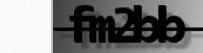

In [4]:
#visualizar screenshot
# Convertir la imagen PIL a modo RGB
image_rgb = captcha_image.convert('RGB')
# Guardar la imagen RGB en un búfer en formato JPEG
buffer = BytesIO()
image_rgb.save(buffer, format='JPEG')
image_bytes = buffer.getvalue()

# Codificar la secuencia de bytes a base64
base64_image = base64.b64encode(image_bytes).decode('utf-8')

display.Image(b64decode(base64_image))

In [14]:
# Inputs del formulario
no_placa=driver.find_element("xpath",'//*[@id="noPlaca"]')
tipo_documento=Select(driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[3]/div[2]/div/div/form/div[4]/div/select'))
no_documento=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[3]/div[2]/div/div/form/div[5]/div[1]/input')
capcha=driver.find_element("xpath",'//*[@id="captchatxt"]')
consultar=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[3]/div[2]/div/div/form/div[9]/button')

In [23]:
#Ingresar datos de consulta
no_placa.send_keys('KLC37G')
tipo_documento.select_by_value('C')
no_documento.send_keys(1019074235)
capcha.send_keys('r7dkm')

In [27]:
#Hacer consulta
consultar.click()

In [28]:
#datos
placa=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[5]/div[2]/div/div[1]/div[2]')
no_licencia=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[5]/div[2]/div/div[2]/div[2]')
estado_vehiculo=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[5]/div[2]/div/div[2]/div[4]')
tipo_servicio=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[5]/div[2]/div/div[3]/div[2]')
clase_vehiculo=driver.find_element("xpath",'/html/body/div[1]/div/div[1]/div[2]/div[1]/div[2]/div[1]/div[5]/div[2]/div/div[3]/div[4]')
marca=driver.find_element("xpath",'//*[@id="pnlInformacionGeneralVehiculo"]/div/div/div/div[1]/div[2]')


'ACTIVO'